<div class="usecase-title">Enhancing Job Accessibility and Opportunities in Melbourne</div>
<div class="usecase-authors"><b>Authored by: </b> Tharaka Sandamal And Sahan Chamod</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>
<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data Analysis, Pandas, Data Visualization</div>


<div class="usecase-section-header">Scenario</div>

Melbourne experiences disparities in job accessibility, affecting economic opportunities and social inclusion. Effective matching of job seekers with available employment relies heavily on the spatial distribution of jobs and accessibility via public transport. Current decision-making lacks comprehensive spatial insights, creating challenges for urban planners, policy-makers, and businesses aiming to improve employment access across various city regions.
 
## Project Objective:

To analyze and enhance job accessibility by examining spatial distribution patterns of jobs, public transport accessibility, and areas for potential employment growth in Melbourne.
 
## Project Stages:
 
### Stage 1: Data Collection & Integration

- Acquire datasets from:

  - Employment by Block by CLUE Industry (2002-2023)

  - Metro Train Stations with Accessibility Information

  - Bus Stops locations

  - Floor Space by Use by Block (2002-2023)

- Preprocess data to handle suppressed cells, confidentialized entries, missing values, and integrate data spatially for unified analysis.
 
### Stage 2: Exploratory Data Analysis (EDA)

- Analyze employment data by sector and block to determine high-density employment clusters.

- Evaluate the public transport network (train and bus stations) to identify accessibility coverage.

- Examine floor space usage to assess commercial and business concentration.
 
### Stage 3: Spatial Accessibility Analysis

- Develop geospatial models integrating employment density, train station accessibility, and bus stop coverage.

- Identify regions with strong job availability but poor transport connectivity, highlighting accessibility gaps.

- Pinpoint areas suitable for employment growth and potential infrastructure improvements.
 
### Stage 4: Visualization and Dashboard Development

- Create interactive maps and dashboards (using GIS tools or visualization software like Tableau or Power BI) to visualize employment hotspots, transport accessibility, and identified gaps.

- Enable stakeholders such as urban planners, local authorities, and employment agencies to make informed decisions based on visual insights.
 
### Stage 5: Recommendations and Strategic Planning

- Provide strategic recommendations to policymakers for improving job accessibility through targeted infrastructure enhancements and optimized transport routes.

- Suggest potential areas for new business development and skill-development programs aligned with spatial job distribution.
 
## Expected Outcomes:

- Improved understanding of spatial employment distribution and accessibility.

- Enhanced connectivity between job seekers and employment opportunities.

- Data-driven policy-making and urban planning for economic growth and increased social inclusion.

- Identification of priority regions for infrastructure investment and skill-development programs.
 
## Dataset Descriptions:
 
### 1. Employment by Block by CLUE Industry (2002-2023)

- Contains employment data showing job counts per city block, categorized by industry and small area allocation.

- Valuable for analyzing spatial job density, sectoral employment patterns, and long-term trends.
 
### 2. Metro Train Stations with Accessibility Information

- Details the locations of metro train stations along with accessibility features.

- Crucial for evaluating public transport coverage and accessibility to employment areas.
 
### 3. Bus Stops

- Provides geospatial locations of bus stops across Melbourne.

- Important for assessing bus network coverage and accessibility gaps relative to employment opportunities.
 
### 4. Floor Space by Use by Block (2002-2023)

- Offers data on floor space usage categorized by type (commercial, office, retail, etc.) and city block.

- Useful for determining business concentration, commercial capacity, and potential for employment growth.
 

### Package/Library Imports

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\thara\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from config import API_KEY # import API_KEY from config file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 
import pandas as pd 
from io import StringIO

### Read data using API

In [5]:
from config import API_KEY  # Import API key securely

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 
from io import StringIO

# Preferred Method: Export Endpoint

# Function to collect data from the City of Melbourne Open Data API
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': API_KEY  # use if datasets require API key permissions
    }

    # GET request
    response = requests.get(url, params=params)
    if response.status_code == 200:
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset 
    else:
        print(f'Request failed with status code {response.status_code}')

# Read data using the function
transport_df = collect_data('metro-train-stations-with-accessibility-information')
emp_block_df = collect_data('employment-by-block-by-clue-industry')
Bus_df = collect_data('bus-stops')
floor_df = collect_data('floor-space-by-use-by-block')


## Step 1.2: Data Inspection 

### Employment by Block by CLUE Industry

In [1]:
# Preview the dataset
print("First 5 records:")
display(emp_block_df.head())

# Check shape and column names
print("Shape:", emp_block_df.shape)
print("\nColumn Names:")
print(emp_block_df.columns.tolist())

# Check data types
print("\nData Types:")
print(emp_block_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(emp_block_df.isnull().sum())


# Get unique industries if present
if 'industry' in emp_block_df.columns:
    print("\nUnique Industries:")
    print(emp_block_df['industry'].unique())



First 5 records:


NameError: name 'emp_block_df' is not defined

### Metro Train Stations with Accessibility Information

In [9]:
# Preview train stations dataset
print("First 5 records:")
display(transport_df.head())

# Check shape and columns
print("Shape:", transport_df.shape)
print("\nColumn Names:")
print(transport_df.columns.tolist())

# Data types
print("\nData Types:")
print(transport_df.dtypes)

# Missing values
print("\nMissing Values:")
print(transport_df.isnull().sum())


First 5 records:


,geo_point_2d,geo_shape,he_loop,lift,pids,station
0,"-37.86884299999997, 145.07955800000002","{""coordinates"": [145.07955800000002, -37.86884...",No,No,No,Alamein
1,"-37.77765599999998, 144.82470999999998","{""coordinates"": [144.82470999999998, -37.77765...",No,No,Dot Matrix,Albion
2,"-37.775420999999994, 144.92188399999998","{""coordinates"": [144.92188399999998, -37.77542...",No,No,No,Ascot Vale
3,"-37.861767999999984, 145.081416","{""coordinates"": [145.081416, -37.8617679999999...",No,No,No,Ashburton
4,"-37.86974699999996, 144.993516","{""coordinates"": [144.993516, -37.8697469999999...",No,No,Dot Matrix,Balaclava


Shape: (219, 6)

Column Names:
['geo_point_2d', 'geo_shape', 'he_loop', 'lift', 'pids', 'station']

Data Types:
geo_point_2d    object
geo_shape       object
he_loop         object
lift            object
pids            object
station         object
dtype: object

Missing Values:
geo_point_2d    0
geo_shape       0
he_loop         0
lift            0
pids            0
station         0
dtype: int64


## Bus Stops

In [11]:
# Preview Bus Stops dataset
print("First 5 records:")
display(Bus_df.head())

# Check shape and column names
print("Shape:", Bus_df.shape)
print("\nColumn Names:")
print(Bus_df.columns.tolist())

# Data types
print("\nData Types:")
print(Bus_df.dtypes)

# Missing values
print("\nMissing Values:")
print(Bus_df.isnull().sum())


First 5 records:


,geo_point_2d,geo_shape,prop_id,addresspt1,addressp_1,asset_clas,asset_type,objectid,str_id,addresspt,asset_subt,model_desc,mcc_id,roadseg_id,descriptio,model_no
0,"-37.81842481335676, 144.96889648633675","{""coordinates"": [144.96889648633675, -37.81842...",573333,29.149053,288,Signage,Sign - Public Transport,749,1249454,606816,NaN,Sign - Public Transport 1 Panel,1249454,0,Sign - Public Transport 1 Panel Bus Stop Type 12,P.16
1,"-37.81767597164006, 144.95888238475013","{""coordinates"": [144.95888238475013, -37.81767...",0,10.537902,105,Signage,Sign - Public Transport,2098,1247042,507646,NaN,Sign - Public Transport 1 Panel,1247042,20118,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
2,"-37.78188915501449, 144.95963193312105","{""coordinates"": [144.95963193312105, -37.78188...",0,25.269643,212,Signage,Sign - Public Transport,2143,1252383,108510,NaN,Sign - Public Transport 1 Panel,1252383,22387,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
3,"-37.793726533289785, 144.94716743007305","{""coordinates"": [144.94716743007305, -37.79372...",0,44.230506,237,Signage,Sign - Public Transport,2627,1249788,100087,NaN,Sign - Public Transport 1 Panel,1249788,20919,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
4,"-37.80286165064241, 144.92778487963457","{""coordinates"": [144.92778487963457, -37.80286...",0,67.718553,360,Signage,Sign - Public Transport,3306,1235311,103002,NaN,Sign - Public Transport 1 Panel,1235311,21680,Sign - Public Transport 1 Panel Bus Stop Type 13,P.16


Shape: (309, 16)

Column Names:
['geo_point_2d', 'geo_shape', 'prop_id', 'addresspt1', 'addressp_1', 'asset_clas', 'asset_type', 'objectid', 'str_id', 'addresspt', 'asset_subt', 'model_desc', 'mcc_id', 'roadseg_id', 'descriptio', 'model_no']

Data Types:
geo_point_2d     object
geo_shape        object
prop_id           int64
addresspt1      float64
addressp_1        int64
asset_clas       object
asset_type       object
objectid          int64
str_id            int64
addresspt         int64
asset_subt      float64
model_desc       object
mcc_id            int64
roadseg_id        int64
descriptio       object
model_no         object
dtype: object

Missing Values:
geo_point_2d      0
geo_shape         0
prop_id           0
addresspt1        0
addressp_1        0
asset_clas        0
asset_type        0
objectid          0
str_id            0
addresspt         0
asset_subt      309
model_desc        0
mcc_id            0
roadseg_id        0
descriptio        0
model_no          0
dtype: int

### Floor Space by Use by Block

In [13]:
# Preview floor space dataset
print("First 5 records:")
display(floor_df.head())

# Check shape and columns
print("Shape:", floor_df.shape)
print("\nColumn Names:")
print(floor_df.columns.tolist())

# Data types
print("\nData Types:")
print(floor_df.dtypes)

# Missing values
print("\nMissing Values:")
print(floor_df.isnull().sum())


First 5 records:


,census_year,block_id,clue_small_area,commercial_accommodation,common_area,community_use,educational_research,entertainment_recreation_indoor,equipment_installation,hospital_clinic,...,transport,transport_storage_uncovered,unoccupied_under_construction,unoccupied_under_demolition_condemned,unoccupied_under_renovation,unoccupied_undeveloped_site,unoccupied_unused,wholesale,workshop_studio,total_floor_space_in_block
0,2007,527,Kensington,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,21138.0
1,2007,529,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,10098.0
2,2007,534,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2007,539,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,49600.0
4,2007,542,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1735.0


Shape: (13000, 41)

Column Names:
['census_year', 'block_id', 'clue_small_area', 'commercial_accommodation', 'common_area', 'community_use', 'educational_research', 'entertainment_recreation_indoor', 'equipment_installation', 'hospital_clinic', 'house_townhouse', 'institutional_accommodation', 'manufacturing', 'office', 'park_reserve', 'parking_commercial_covered', 'parking_commercial_uncovered', 'parking_private_covered', 'parking_private_uncovered', 'performances_conferences_ceremonies', 'private_outdoor_space', 'public_display_area', 'residential_apartment', 'retail_cars', 'retail_shop', 'retail_showroom', 'retail_stall', 'sports_and_recreation_outdoor', 'square_promenade', 'storage', 'student_accommodation', 'transport', 'transport_storage_uncovered', 'unoccupied_under_construction', 'unoccupied_under_demolition_condemned', 'unoccupied_under_renovation', 'unoccupied_undeveloped_site', 'unoccupied_unused', 'wholesale', 'workshop_studio', 'total_floor_space_in_block']

Data Types:
ce

## Step 1.3: Data Cleaning 

### Employment Dataset – Handle Missing Values and Recalculate Totals


- Missing values in job sector columns are assumed to represent zero jobs.
- Fill them with 0 and recalculate the total number of jobs in each block.

In [14]:
# Fill missing job sector values with 0
emp_block_df.fillna(0, inplace=True)

# Recalculate total jobs in block from individual sectors
sector_columns = emp_block_df.columns[3:-1]
emp_block_df['total_jobs_in_block'] = emp_block_df[sector_columns].sum(axis=1)

# Confirm all missing values are handled
print("Employment Data - Remaining missing values:", emp_block_df.isnull().sum().sum())


Employment Data - Remaining missing values: 0


### Cleaning Metro Train Stations Dataset

- Split the `geo_point_2d` column into `latitude` and `longitude`.
- Convert the dataset into a GeoDataFrame for spatial analysis and mapping.

In [18]:
from shapely.geometry import Point
import geopandas as gpd

# Extract latitude and longitude
transport_df[['latitude', 'longitude']] = transport_df['geo_point_2d'].str.split(',', expand=True).astype(float)

# Create GeoDataFrame
transport_geometry = [Point(xy) for xy in zip(transport_df['longitude'], transport_df['latitude'])]
transport_gdf = gpd.GeoDataFrame(transport_df, geometry=transport_geometry)
transport_gdf.set_crs(epsg=4326, inplace=True)

# Preview
transport_gdf.head()

print("Metro Train Stations Data - Remaining missing values:", transport_gdf.isnull().sum().sum())


Metro Train Stations Data - Remaining missing values: 0


### Cleaning Bus Stops Dataset

- Coordinates are split from the `geo_point_2d` field.
- Data is converted into a GeoDataFrame with EPSG:4326 CRS for mapping.

In [19]:
# Extract latitude and longitude
Bus_df[['latitude', 'longitude']] = Bus_df['geo_point_2d'].str.split(',', expand=True).astype(float)

# Create GeoDataFrame
bus_geometry = [Point(xy) for xy in zip(Bus_df['longitude'], Bus_df['latitude'])]
bus_gdf = gpd.GeoDataFrame(Bus_df, geometry=bus_geometry)
bus_gdf.set_crs(epsg=4326, inplace=True)

# Preview
bus_gdf.head()

print("Bus Stops Data - Remaining missing values:", bus_gdf.isnull().sum().sum())

Bus Stops Data - Remaining missing values: 309


Check Column-Wise Missing Value Count

In [23]:
# Show missing values per column
bus_gdf.isnull().sum()


geo_point_2d      0
geo_shape         0
prop_id           0
addresspt1        0
addressp_1        0
asset_clas        0
asset_type        0
objectid          0
str_id            0
addresspt         0
asset_subt      309
model_desc        0
mcc_id            0
roadseg_id        0
descriptio        0
model_no          0
latitude          0
longitude         0
geometry          0
dtype: int64

The `asset_subt` column is completely missing for all records. Since it appears to be a numeric field and is not essential for the spatial or analytical objectives of the project, missing values are replaced with 0.

In [25]:
# Replace missing numeric values in 'asset_subt' with 0 safely
bus_gdf['asset_subt'] = bus_gdf['asset_subt'].fillna(0)

# Confirm all missing values are handled
print("Bus Stops Data – Remaining missing values:", bus_gdf.isnull().sum().sum())


Bus Stops Data – Remaining missing values: 0


### Cleaning Floor Space by Use by Block


- Most missing values likely represent zero allocated floor space.
- Fill them with 0 to ensure clean aggregation later.

In [22]:
# Fill missing values with 0
floor_df.fillna(0, inplace=True)

# Confirm all missing values are handled
print("Floor Space Data - Remaining missing values:", floor_df.isnull().sum().sum())

# Preview
floor_df.head()



Floor Space Data - Remaining missing values: 0


,census_year,block_id,clue_small_area,commercial_accommodation,common_area,community_use,educational_research,entertainment_recreation_indoor,equipment_installation,hospital_clinic,...,transport,transport_storage_uncovered,unoccupied_under_construction,unoccupied_under_demolition_condemned,unoccupied_under_renovation,unoccupied_undeveloped_site,unoccupied_unused,wholesale,workshop_studio,total_floor_space_in_block
0,2007,527,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21138.0
1,2007,529,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10098.0
2,2007,534,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,539,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49600.0
4,2007,542,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1735.0


# Section 2: Exploratory Data Analysis (EDA)

This section explores spatial and non-spatial characteristics of each dataset. The aim is to identify patterns, hotspots, and gaps that affect job accessibility across Melbourne. Each dataset is analyzed individually and in combination with others to generate insights.


## 2.1 Employment Trends – Distribution by Sector and Year

This section analyzes employment data to identify:
- The most dominant industries across Melbourne
- Total employment trends across census years
- High-employment blocks that serve as key job hubs

Understanding these patterns provides a baseline for evaluating accessibility and transport infrastructure.


### Total Employment by Year

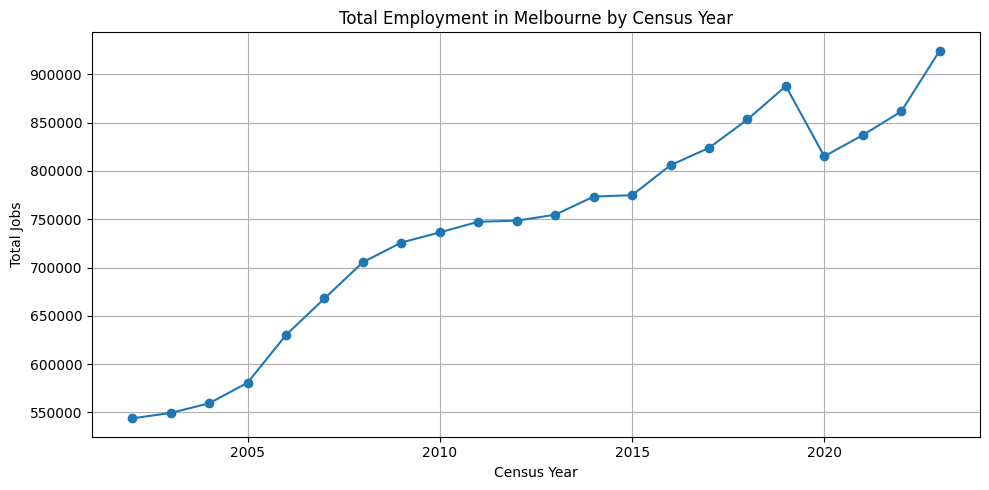

In [26]:
# Group and sum employment by year
employment_by_year = emp_block_df.groupby('census_year')['total_jobs_in_block'].sum().reset_index()

# Plot employment growth over time
plt.figure(figsize=(10, 5))
plt.plot(employment_by_year['census_year'], employment_by_year['total_jobs_in_block'], marker='o')
plt.title('Total Employment in Melbourne by Census Year')
plt.xlabel('Census Year')
plt.ylabel('Total Jobs')
plt.grid(True)
plt.tight_layout()
plt.show()


### Top Industries in the Most Recent Census Year

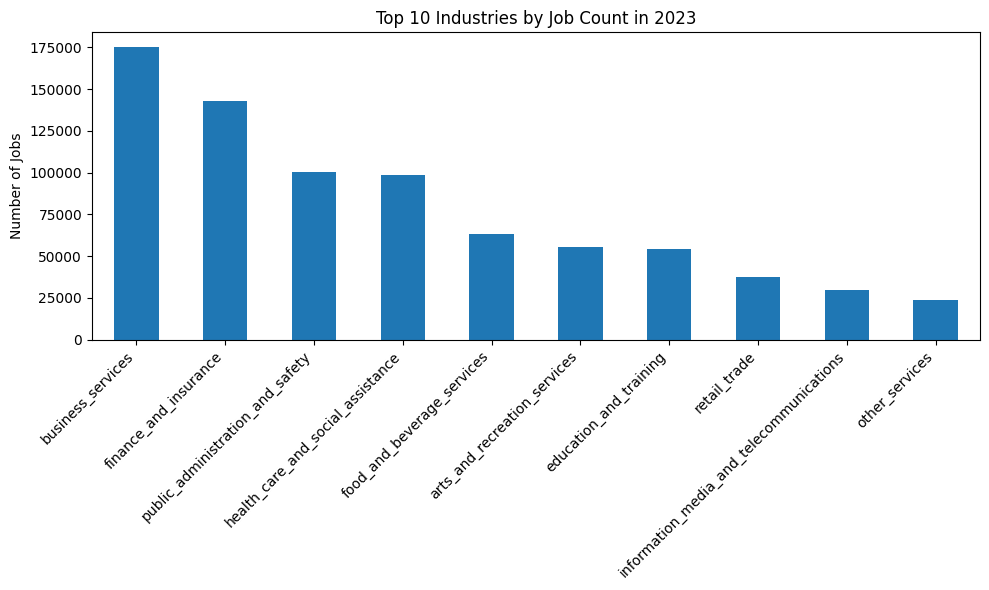

In [27]:
# Identify the latest census year
latest_year = emp_block_df['census_year'].max()

# Filter dataset for that year
latest_df = emp_block_df[emp_block_df['census_year'] == latest_year]

# Sum total jobs per industry column (excluding metadata and total column)
industry_totals = latest_df.iloc[:, 3:-1].sum().sort_values(ascending=False)

# Plot the top 10 industries by job count
plt.figure(figsize=(10, 6))
industry_totals.head(10).plot(kind='bar')
plt.title(f'Top 10 Industries by Job Count in {latest_year}')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Top Employment Blocks in the Latest Year

In [28]:
# Sort blocks by total job count in descending order
top_blocks = latest_df.sort_values(by='total_jobs_in_block', ascending=False).head(10)

# Display the top employment blocks
top_blocks[['block_id', 'clue_small_area', 'total_jobs_in_block']]


,block_id,clue_small_area,total_jobs_in_block
8677,0,City of Melbourne (total),512574.0
170,1105,Docklands,29753.0
168,1103,Docklands,16643.0
8855,920,Parkville,14270.0
4512,1108,Docklands,13641.0
8864,1101,Docklands,11896.0
4497,870,Melbourne (Remainder),10333.0
4327,22,Melbourne (CBD),9795.0
4342,78,Melbourne (CBD),9717.0
144,803,Southbank,9206.0


## Section 2.2: Public Transport Accessibility – Train and Bus Coverage

This section explores the spatial availability of public transport infrastructure, focusing on metro train stations and bus stops.

The following questions are addressed:

- Where are **train stations** and **bus stops** located across Melbourne?
- Do these locations **align with employment hotspots**?
- Are there **accessibility gaps** in areas with high job concentration?

This analysis will help identify how effectively transport networks support job accessibility and where improvements may be needed.


### Metro Train Stations – Spatial Distribution

This analysis maps the location of metro train stations across Melbourne. Understanding the placement of train stations is essential to assess their coverage of high-employment blocks and identify areas lacking rail-based connectivity.


In [29]:
# Import required mapping libraries
import folium
from folium.plugins import MarkerCluster

# Initialize a folium map centered on Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add clustered markers for train stations
station_cluster = MarkerCluster().add_to(melbourne_map)

for idx, row in transport_gdf.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Station: {row['station']}",
        icon=folium.Icon(color='blue', icon='train', prefix='fa')
    ).add_to(station_cluster)

# Display the map
melbourne_map


### Bus Stops – Spatial Distribution

This analysis visualizes the geographic spread of bus stops throughout Melbourne. As a key component of local mobility, bus stops provide essential first-mile and last-mile connectivity. Mapping their distribution helps assess how well public transport reaches residential and employment areas beyond train coverage.


In [30]:
# Initialize a folium map centered on Melbourne
bus_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add marker cluster for bus stops
bus_cluster = MarkerCluster().add_to(bus_map)

# Add each bus stop to the map
for idx, row in bus_gdf.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Stop ID: {row['prop_id']}",
        icon=folium.Icon(color='green', icon='bus', prefix='fa')
    ).add_to(bus_cluster)

# Show the map
bus_map
